**Problem Statement: Predicting Medical Expenditure using Machine Learning**

**Background:**
Healthcare costs vary widely among individuals depending on factors like age, income, health conditions, insurance coverage, and lifestyle. Understanding and predicting medical expenditures is essential for policymakers, insurers, and healthcare providers to manage resources efficiently and design better health plans.

**Objective:**
The goal of this project is to develop a machine learning model that predicts an individual's medical expenditure based on demographic, economic, and health-related attributes available in the dataset National_Medical_Expenditure.csv.

importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uploading dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/National_Medical_Expenditure.csv')

In [ ]:
display(df)

,Year,NationalMedicalExpenditure,NationalMedicalExpenditure_GrowthRate,NationalMedicalExpenditure_PerPerson,NationalMedicalExpenditure_PerPerson_GrowthRate,GrossDomesticProduct,GrossDomesticProduct_GrowthRate,NationalIncome,NationalIncome_GrowthRate,RatioOf_NationalMedicalExpenditure_PerGDP,RatioOf_NationalMedicalExpenditure_PerNationalIncome,TotalPopulation
0,2020,429665,-3.2,340600,-3.2,5355099.0,-3.9,NaN,NaN,8.02,NaN,126146000
1,2019,443895,2.3,351800,2.5,5573065.0,0.2,4006470.0,-0.4,7.97,11.08,126167000
2,2018,433949,0.8,343200,1.0,5563037.0,0.1,4022687.0,0.4,7.80,10.79,126443000
3,2017,430710,2.2,339900,2.4,5557219.0,2.0,4005164.0,2.1,7.75,10.75,126706000
4,2016,421381,-0.5,332000,-0.4,5448272.0,0.8,3922939.0,-0.1,7.73,10.74,126933000
...,...,...,...,...,...,...,...,...,...,...,...,...
62,1958,3230,11.5,3500,9.4,118451.0,7.1,93829.0,5.8,2.73,3.44,91767000
63,1957,2897,12.2,3200,10.3,110641.0,14.7,88681.0,12.3,2.62,3.27,90928000
64,1956,2583,8.2,2900,7.4,96477.0,12.2,78962.0,13.2,2.68,3.27,90172000
65,1955,2388,11.0,2700,12.5,85979.0,NaN,69733.0,NaN,2.78,3.42,89276000


In [ ]:
df.head()

,Year,NationalMedicalExpenditure,NationalMedicalExpenditure_GrowthRate,NationalMedicalExpenditure_PerPerson,NationalMedicalExpenditure_PerPerson_GrowthRate,GrossDomesticProduct,GrossDomesticProduct_GrowthRate,NationalIncome,NationalIncome_GrowthRate,RatioOf_NationalMedicalExpenditure_PerGDP,RatioOf_NationalMedicalExpenditure_PerNationalIncome,TotalPopulation
0,2020,429665,-3.2,340600,-3.2,5355099.0,-3.9,NaN,NaN,8.02,NaN,126146000
1,2019,443895,2.3,351800,2.5,5573065.0,0.2,4006470.0,-0.4,7.97,11.08,126167000
2,2018,433949,0.8,343200,1.0,5563037.0,0.1,4022687.0,0.4,7.80,10.79,126443000
3,2017,430710,2.2,339900,2.4,5557219.0,2.0,4005164.0,2.1,7.75,10.75,126706000
4,2016,421381,-0.5,332000,-0.4,5448272.0,0.8,3922939.0,-0.1,7.73,10.74,126933000


In [ ]:
df.shape

(67, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Year                                                  67 non-null     int64  
 1   NationalMedicalExpenditure                            67 non-null     int64  
 2   NationalMedicalExpenditure_GrowthRate                 66 non-null     float64
 3   NationalMedicalExpenditure_PerPerson                  67 non-null     int64  
 4   NationalMedicalExpenditure_PerPerson_GrowthRate       66 non-null     float64
 5   GrossDomesticProduct                                  66 non-null     float64
 6   GrossDomesticProduct_GrowthRate                       65 non-null     float64
 7   NationalIncome                                        65 non-null     float64
 8   NationalIncome_GrowthRate                             64 non-n

In [ ]:
df.describe()

,Year,NationalMedicalExpenditure,NationalMedicalExpenditure_GrowthRate,NationalMedicalExpenditure_PerPerson,NationalMedicalExpenditure_PerPerson_GrowthRate,GrossDomesticProduct,GrossDomesticProduct_GrowthRate,NationalIncome,NationalIncome_GrowthRate,RatioOf_NationalMedicalExpenditure_PerGDP,RatioOf_NationalMedicalExpenditure_PerNationalIncome,TotalPopulation
count,67.000000,67.000000,66.000000,67.000000,66.000000,6.600000e+01,65.000000,6.500000e+01,64.000000,66.000000,65.000000,6.700000e+01
mean,1987.000000,190221.343284,8.640909,152368.656716,8.040909,3.222116e+06,6.793846,2.373144e+06,6.779688,5.027576,6.602000,1.157763e+08
std,19.485037,151973.094218,8.041890,118182.843970,7.517016,2.121265e+06,7.106311,1.521229e+06,7.388691,1.686453,2.486616,1.322699e+07
min,1954.000000,2152.000000,-3.200000,2400.000000,-3.200000,8.597900e+04,-4.100000,6.973300e+04,-7.700000,2.450000,3.030000,8.823900e+07
25%,1970.500000,26106.000000,3.025000,25000.000000,2.925000,8.629605e+05,0.700000,6.591050e+05,0.925000,3.335000,4.130000,1.044325e+08
50%,1987.000000,180759.000000,5.900000,147800.000000,5.350000,3.749912e+06,5.900000,2.810998e+06,5.000000,4.880000,6.210000,1.222640e+08
75%,2003.500000,318243.000000,12.800000,249300.000000,12.725000,5.259931e+06,11.100000,3.766776e+06,12.000000,6.042500,8.270000,1.268160e+08
max,2020.000000,443895.000000,36.200000,351800.000000,34.300000,5.573065e+06,21.000000,4.022687e+06,23.000000,8.020000,11.080000,1.280570e+08


In [ ]:
df.columns

NameError: name 'df' is not defined

In [ ]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Year,NationalMedicalExpenditure,NationalMedicalExpenditure_GrowthRate,NationalMedicalExpenditure_PerPerson,NationalMedicalExpenditure_PerPerson_GrowthRate,GrossDomesticProduct,GrossDomesticProduct_GrowthRate,NationalIncome,NationalIncome_GrowthRate,RatioOf_NationalMedicalExpenditure_PerGDP,RatioOf_NationalMedicalExpenditure_PerNationalIncome,TotalPopulation


outlier treatment

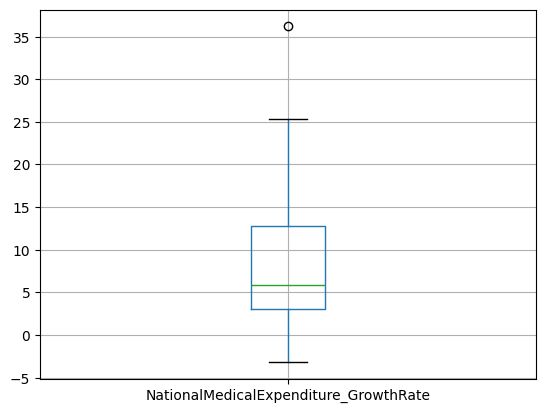

In [ ]:
df.boxplot(column=['NationalMedicalExpenditure_GrowthRate'])
plt.show()

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
a,b=remove_outlier(df['NationalMedicalExpenditure_GrowthRate'])
df['NationalMedicalExpenditure_GrowthRate']=np.where(df['NationalMedicalExpenditure_GrowthRate']>b,b,df['NationalMedicalExpenditure_GrowthRate'])
df['NationalMedicalExpenditure_GrowthRate']=np.where(df['NationalMedicalExpenditure_GrowthRate']<a,a,df['NationalMedicalExpenditure_GrowthRate'])
df.shape

(67, 12)

boxplot after outliler treatment

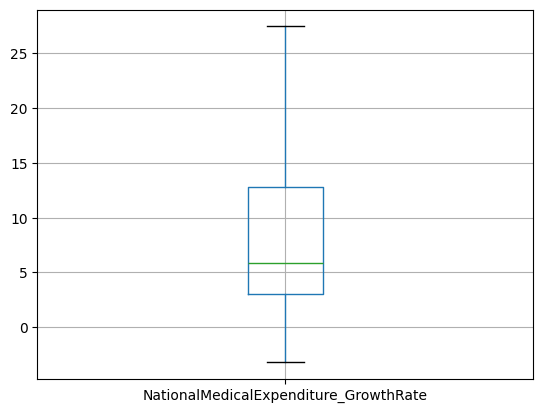

In [ ]:
df.boxplot(column=['NationalMedicalExpenditure_GrowthRate'])
plt.show()

checking missing values

In [ ]:
df.isnull().sum()

,0
Year,0
NationalMedicalExpenditure,0
NationalMedicalExpenditure_GrowthRate,1
NationalMedicalExpenditure_PerPerson,0
NationalMedicalExpenditure_PerPerson_GrowthRate,1
GrossDomesticProduct,1
GrossDomesticProduct_GrowthRate,2
NationalIncome,2
NationalIncome_GrowthRate,3
RatioOf_NationalMedicalExpenditure_PerGDP,1


finding numerical data

In [ ]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

,0
NationalMedicalExpenditure_GrowthRate,float64
NationalMedicalExpenditure_PerPerson_GrowthRate,float64
GrossDomesticProduct,float64
GrossDomesticProduct_GrowthRate,float64
NationalIncome,float64
NationalIncome_GrowthRate,float64
RatioOf_NationalMedicalExpenditure_PerGDP,float64
RatioOf_NationalMedicalExpenditure_PerNationalIncome,float64


replacing null values in numerical columns with median

In [ ]:
median1=df['NationalMedicalExpenditure_GrowthRate'].median()
median2=df['NationalMedicalExpenditure_PerPerson_GrowthRate'].median()
median3=df['GrossDomesticProduct'].median()
median4=df['GrossDomesticProduct_GrowthRate'].median()
median5=df['NationalIncome'].median()
median6=df['NationalIncome_GrowthRate'].median()
median7=df['RatioOf_NationalMedicalExpenditure_PerGDP'].median()
median8=df['RatioOf_NationalMedicalExpenditure_PerNationalIncome'].median()

df['NationalMedicalExpenditure_GrowthRate'].replace(np.nan,median1,inplace=True)
df['NationalMedicalExpenditure_PerPerson_GrowthRate'].replace(np.nan,median2,inplace=True)
df['GrossDomesticProduct'].replace(np.nan,median3,inplace=True)
df['GrossDomesticProduct_GrowthRate'].replace(np.nan,median4,inplace=True)
df['NationalIncome'].replace(np.nan,median5,inplace=True)
df['NationalIncome_GrowthRate'].replace(np.nan,median6,inplace=True)
df['RatioOf_NationalMedicalExpenditure_PerGDP'].replace(np.nan,median7,inplace=True)
df['RatioOf_NationalMedicalExpenditure_PerNationalIncome'].replace(np.nan,median8,inplace=True)

/tmp/ipython-input-3794573523.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NationalMedicalExpenditure_GrowthRate'].replace(np.nan,median1,inplace=True)
/tmp/ipython-input-3794573523.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

checking missing values after treatment

In [ ]:
df.isnull().sum()

,0
Year,0
NationalMedicalExpenditure,0
NationalMedicalExpenditure_GrowthRate,0
NationalMedicalExpenditure_PerPerson,0
NationalMedicalExpenditure_PerPerson_GrowthRate,0
GrossDomesticProduct,0
GrossDomesticProduct_GrowthRate,0
NationalIncome,0
NationalIncome_GrowthRate,0
RatioOf_NationalMedicalExpenditure_PerGDP,0


univariate analysis

/tmp/ipython-input-1324987143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.NationalMedicalExpenditure_GrowthRate,bins=20)


<Axes: xlabel='NationalMedicalExpenditure_GrowthRate', ylabel='Density'>

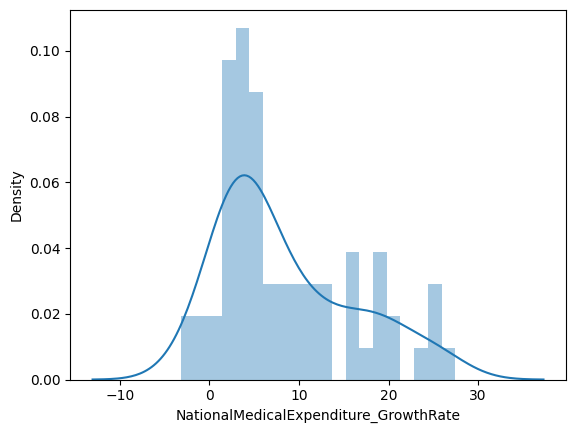

In [ ]:
sns.distplot(df.NationalMedicalExpenditure_GrowthRate,bins=20)

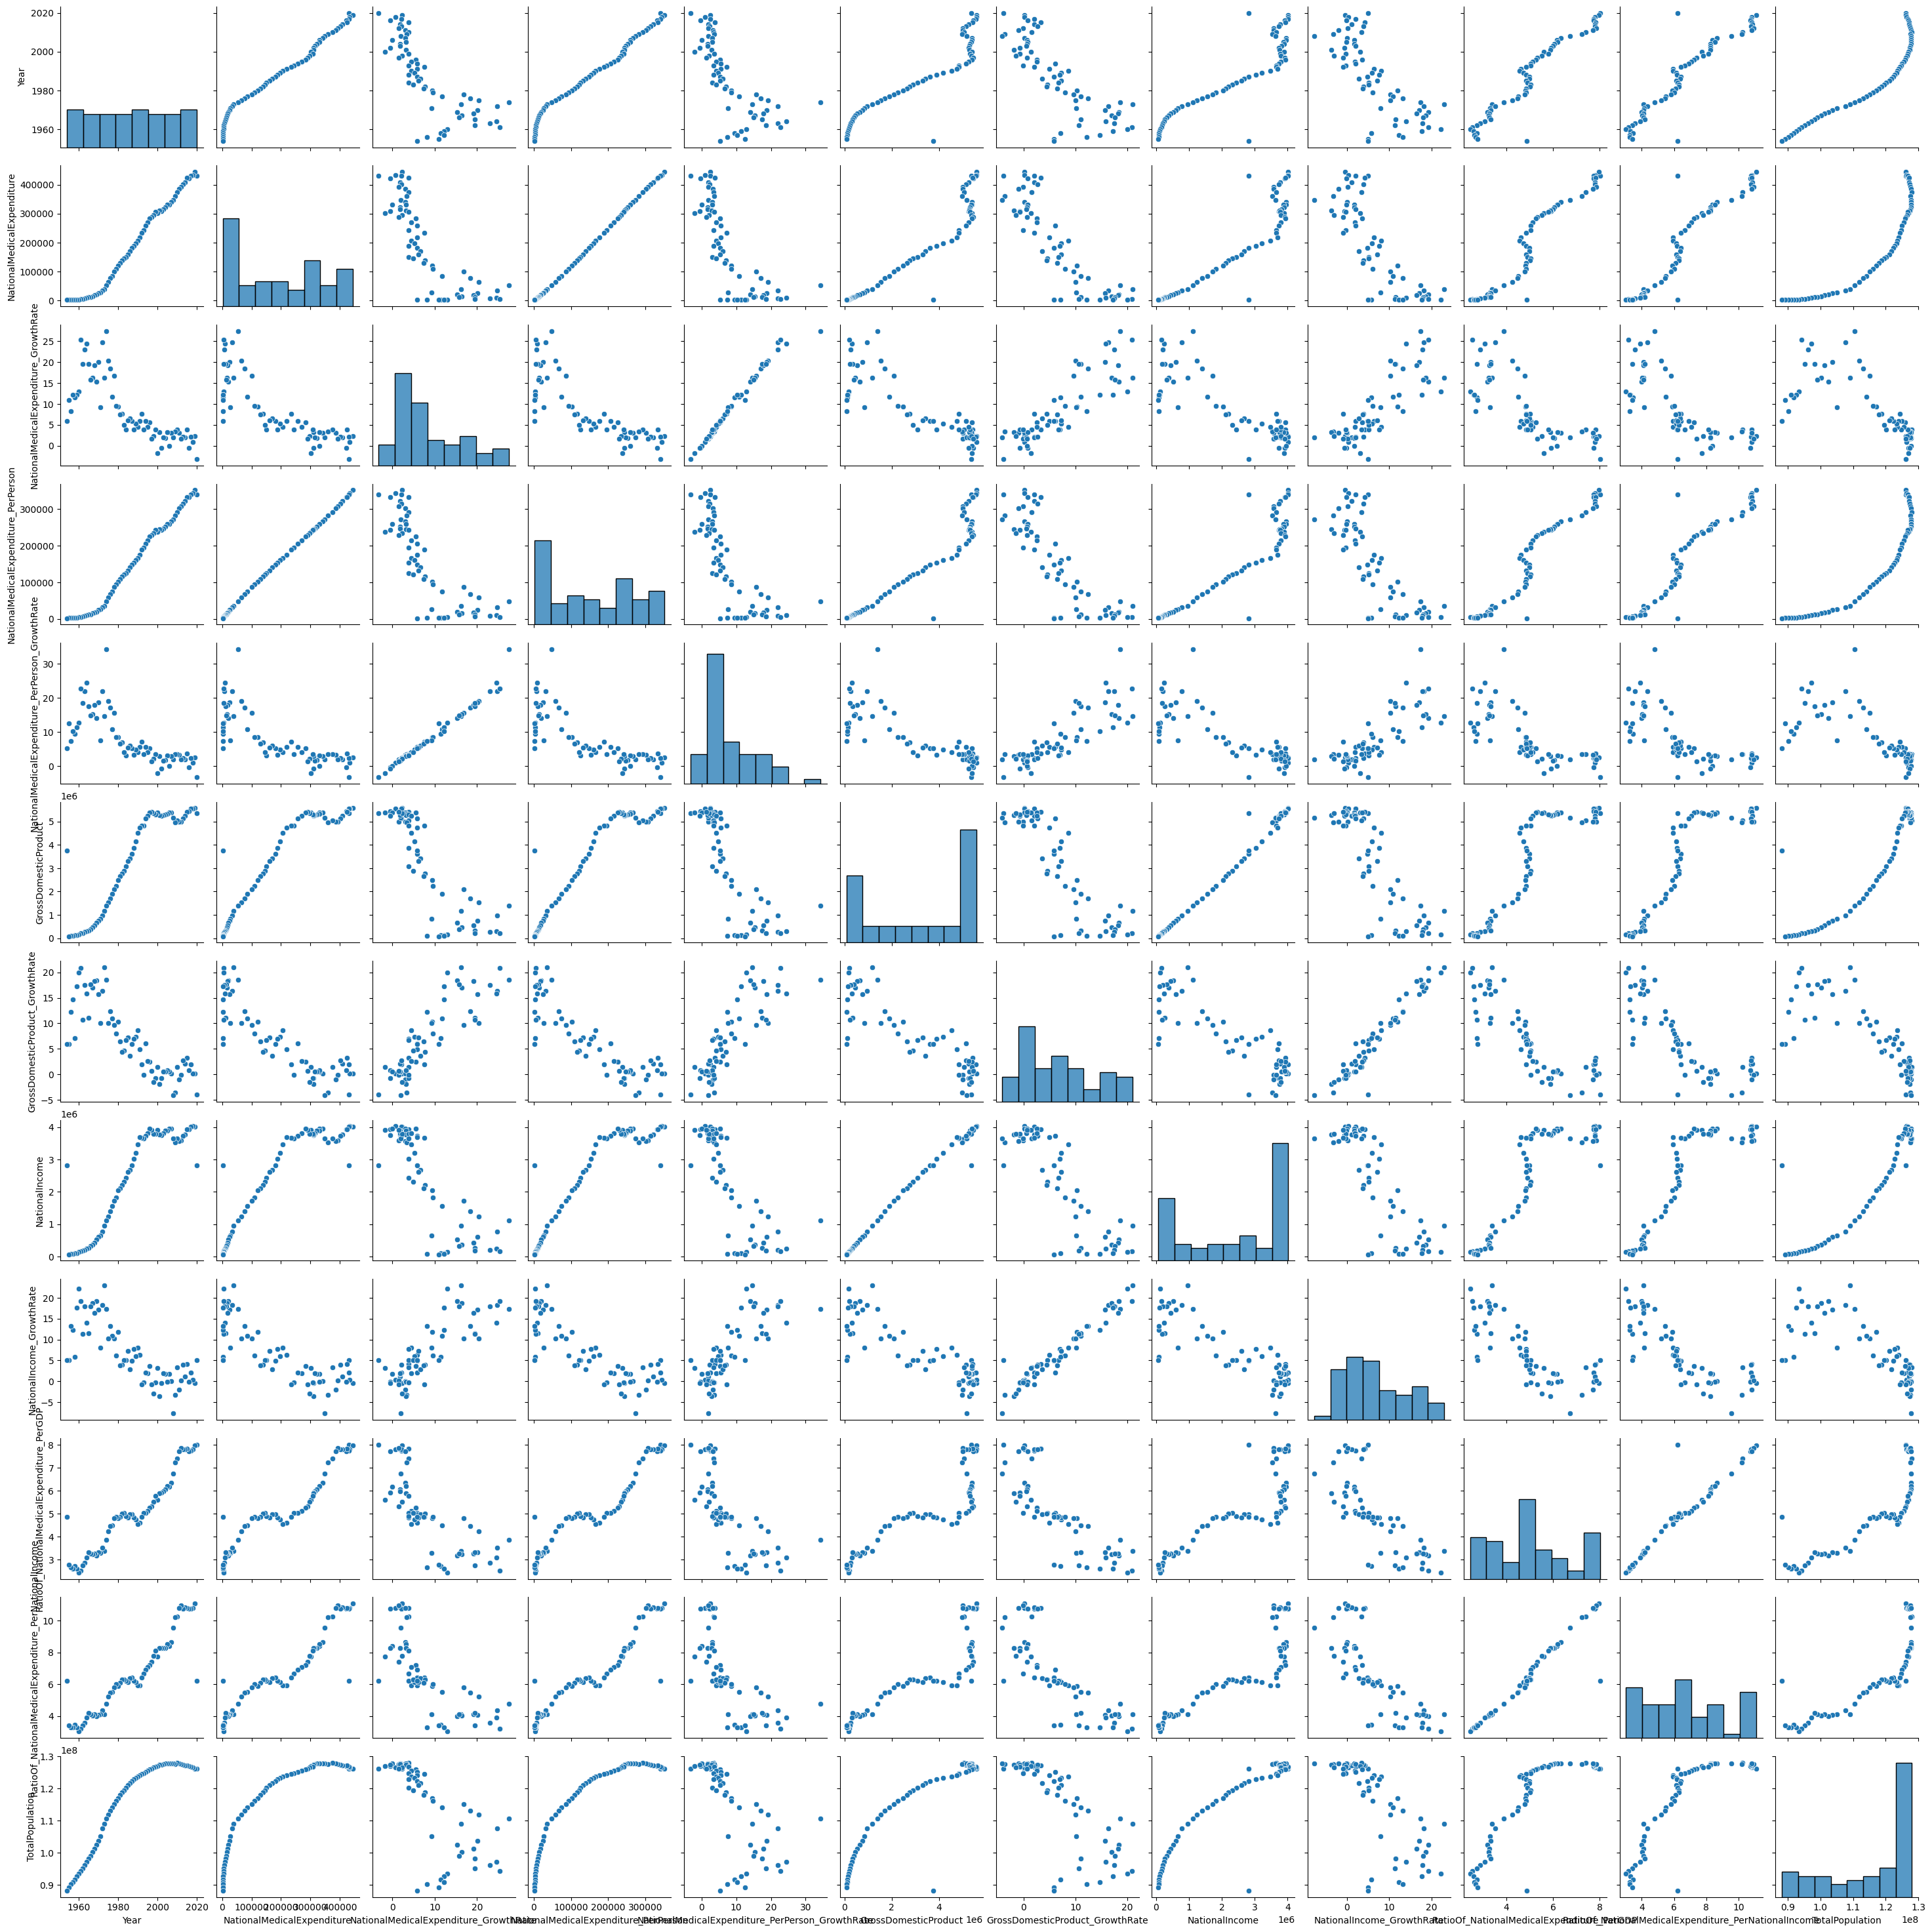

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.corr()

,Year,NationalMedicalExpenditure,NationalMedicalExpenditure_GrowthRate,NationalMedicalExpenditure_PerPerson,NationalMedicalExpenditure_PerPerson_GrowthRate,GrossDomesticProduct,GrossDomesticProduct_GrowthRate,NationalIncome,NationalIncome_GrowthRate,RatioOf_NationalMedicalExpenditure_PerGDP,RatioOf_NationalMedicalExpenditure_PerNationalIncome,TotalPopulation
Year,1.000000,0.988501,-0.769688,0.990267,-0.731034,0.922515,-0.820036,0.901765,-0.759381,0.954567,0.934397,0.924132
NationalMedicalExpenditure,0.988501,1.000000,-0.812860,0.999755,-0.773566,0.938735,-0.856393,0.915351,-0.800920,0.954821,0.944764,0.890373
NationalMedicalExpenditure_GrowthRate,-0.769688,-0.812860,1.000000,-0.812509,0.988228,-0.848670,0.867149,-0.834921,0.820995,-0.758561,-0.741150,-0.734498
NationalMedicalExpenditure_PerPerson,0.990267,0.999755,-0.812509,1.000000,-0.773170,0.940298,-0.856038,0.917819,-0.800624,0.956505,0.944454,0.897309
NationalMedicalExpenditure_PerPerson_GrowthRate,-0.731034,-0.773566,0.988228,-0.773170,1.000000,-0.811416,0.841330,-0.798286,0.794188,-0.718853,-0.701520,-0.699525
GrossDomesticProduct,0.922515,0.938735,-0.848670,0.940298,-0.811416,1.000000,-0.882579,0.994028,-0.847149,0.881013,0.881429,0.918243
GrossDomesticProduct_GrowthRate,-0.820036,-0.856393,0.867149,-0.856038,0.841330,-0.882579,1.000000,-0.864574,0.968722,-0.821677,-0.807681,-0.789701
NationalIncome,0.901765,0.915351,-0.834921,0.917819,-0.798286,0.994028,-0.864574,1.000000,-0.843040,0.859154,0.876766,0.924562
NationalIncome_GrowthRate,-0.759381,-0.800920,0.820995,-0.800624,0.794188,-0.847149,0.968722,-0.843040,1.000000,-0.760401,-0.786278,-0.753817
RatioOf_NationalMedicalExpenditure_PerGDP,0.954567,0.954821,-0.758561,0.956505,-0.718853,0.881013,-0.821677,0.859154,-0.760401,1.000000,0.966827,0.840726


correlation heatmap

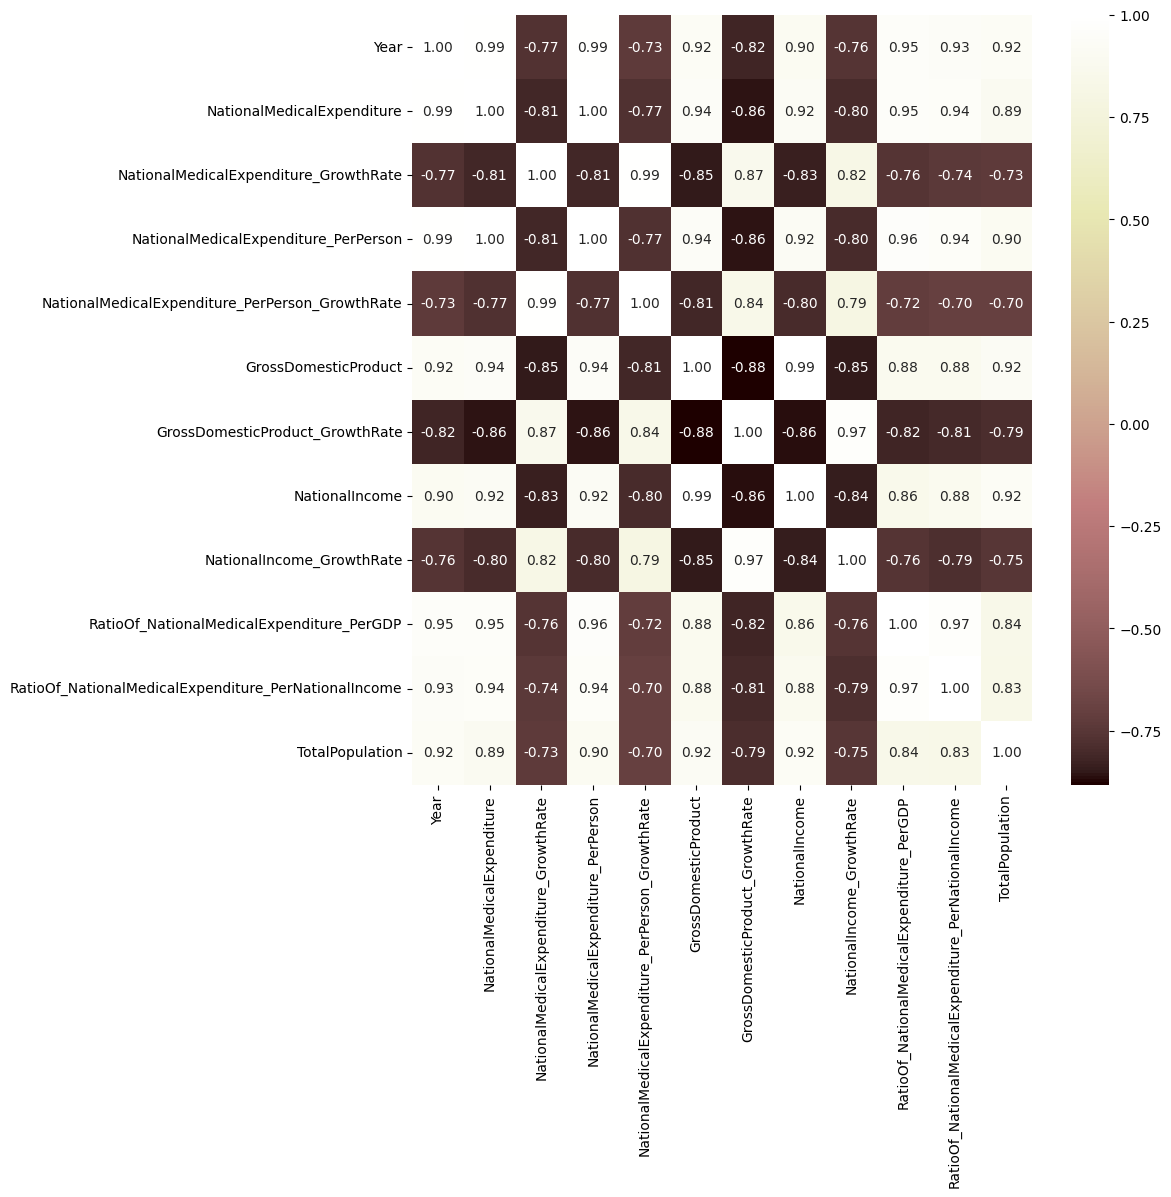

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="pink")
plt.show()

normalization and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler(copy=True,with_mean=True,with_std=True)

StandardScaler()

In [ ]:
df['NationalMedicalExpenditure_GrowthRate']=std_scale.fit_transform(df[['NationalMedicalExpenditure_GrowthRate']])
df['NationalMedicalExpenditure_PerPerson_GrowthRate']=std_scale.fit_transform(df[['NationalMedicalExpenditure_PerPerson_GrowthRate']])
df['GrossDomesticProduct']=std_scale.fit_transform(df[['GrossDomesticProduct']])
df['GrossDomesticProduct_GrowthRate']=std_scale.fit_transform(df[['GrossDomesticProduct_GrowthRate']])
df['NationalIncome']=std_scale.fit_transform(df[['NationalIncome']])
df['NationalIncome_GrowthRate']=std_scale.fit_transform(df[['NationalIncome_GrowthRate']])
df['RatioOf_NationalMedicalExpenditure_PerGDP']=std_scale.fit_transform(df[['RatioOf_NationalMedicalExpenditure_PerGDP']])
df['RatioOf_NationalMedicalExpenditure_PerNationalIncome']=std_scale.fit_transform(df[['RatioOf_NationalMedicalExpenditure_PerNationalIncome']])

In [ ]:
df.head()

,Year,NationalMedicalExpenditure,NationalMedicalExpenditure_GrowthRate,NationalMedicalExpenditure_PerPerson,NationalMedicalExpenditure_PerPerson_GrowthRate,GrossDomesticProduct,GrossDomesticProduct_GrowthRate,NationalIncome,NationalIncome_GrowthRate,RatioOf_NationalMedicalExpenditure_PerGDP,RatioOf_NationalMedicalExpenditure_PerNationalIncome,TotalPopulation
0,2020,429665,-1.548725,340600,-1.511336,1.016629,-1.535494,0.285349,-0.236961,1.802702,-0.156423,126146000
1,2019,443895,-0.818794,351800,-0.742225,1.120902,-0.945316,1.088408,-0.989659,1.772603,1.846684,126167000
2,2018,433949,-1.017866,343200,-0.944622,1.116105,-0.959711,1.099301,-0.878148,1.670267,1.727402,126443000
3,2017,430710,-0.832066,339900,-0.755718,1.113321,-0.686213,1.087530,-0.641188,1.640168,1.710950,126706000
4,2016,421381,-1.190395,332000,-1.133527,1.061202,-0.858948,1.032296,-0.947843,1.628128,1.706837,126933000


There is no categorical data in my dataset.Hence,encoding isn't possible

**Conclusion**

The analysis of the National Medical Expenditure dataset reveals clear patterns in how healthcare spending has evolved over the years. Overall, medical expenses have steadily increased, showing a consistent upward trend with only a few minor dips along the way.

There’s a strong link between National Medical Expenditure and GDP, suggesting that when the economy grows, healthcare spending tends to grow along with it. The same trend is seen in per-person medical expenses, which continue to rise—indicating that the cost of healthcare for individuals has also been climbing steadily.

These findings highlight that healthcare spending is deeply tied to the nation’s economic performance, and that changes in government policy or economic conditions can directly influence how much is spent on health services.

If predictive modeling or forecasting techniques were applied, the data suggests that past expenditure and GDP trends can be strong indicators of future medical costs. This makes such analysis valuable for budget planning, resource allocation, and policy formulation in the healthcare sector.